# Week 6, Mini Project 1, Fruit Identification

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

# 1. Download the Dataset
Download the fataset from the following link:
https://www.kaggle.com/moltean/fruits

# 2. Reading the Dataset
Read and prepare your dataset. \
Divide your dataset into training and testing sets: \
70% training set. \
30% testing set.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
# increase the number of training images by making changes on the images

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [4]:
# Locate and assign Training Set
training_set = train_datagen.flow_from_directory('C:/Users/abdul/OneDrive/ARD/Brain/Western/TECH6303 Python for Machine Learning/Week6/MP1/fruits-360_dataset/fruits-360/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 67692 images belonging to 131 classes.


In [5]:
# Locate and assign Test Set
test_set = test_datagen.flow_from_directory('C:/Users/abdul/OneDrive/ARD/Brain/Western/TECH6303 Python for Machine Learning/Week6/MP1/fruits-360_dataset/fruits-360/Test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False) # didn't shuffle the data so we know the order of test data to compare predicted with actual

Found 22688 images belonging to 131 classes.


# 3. Define Your Convolutional Neural Network
Define a CNN with the following layers: \
The input layer is a 2-D convolutional layer with the following parameters: \
16 units; \
convolution window size: 2x2; \
activation function: ReLU; and \
input shape: 100x100x3 

Define a 2D max pooling layer with pool size of 2x2.

Define a 2D convolutional layer with the following parameters: \
32 units; \
convolution window size: 2x2; \
activation function: ReLU; and 

a 2-D max pooling layer with pool size of 2x2.

Define two 2-D convolutional layers, each with the following parameters: \
64 units; \
convolution window size: 2x2; \
activation function: ReLU; 

a 2D max pooling layer with pool size of 2x2;

a dropout layer with 0.3 rate; and

A flattening layer.

Define a fully-connected layer with: \
150 units; \
activation function: ReLU; and

a Dropout layer with a 0.4 rate.

The output layer is a fully connected layer with: \
81 units and \
activation function: softmax.

In [6]:
# Initialising the classifier
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (2, 2), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))

# Step 6 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 7 - Add a dropout layer
classifier.add(Dropout(0.3))

# Step 8 - Flattening
classifier.add(Flatten())

# Step 9 - Full connection
classifier.add(Dense(units = 150, activation = 'relu'))

# Step 10 - Add a dropout layer
classifier.add(Dropout(0.4))

# Step 11 - Output as full connection
classifier.add(Dense(units = 131, activation = 'softmax'))

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        1

# 4. Choosing Hyperparameters
Build the network using the following parameters: \
Optimizer: rmsprop \
Loss function: categorical_crossentropy \
Metrics: accuracy \
Batch size: 32 \
Epochs: 30

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 5. Training Network
Use Keras to implement the network described and train your data. \
Classification metrics: \
Print the accuracy measure on the testing data. \
Print the confusion matrix of the testing data.

In [9]:
# train the model
cnn = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 10, # replaced 30 with 10 to reduce training time
                         validation_data = test_set,
                         validation_steps = 100)

Epoch 1/10
1000/1000 [==============================] - 938s 928ms/step - loss: 2.2758 - accuracy: 0.3919 - val_loss: 0.5704 - val_accuracy: 0.7734
Epoch 2/10
1000/1000 [==============================] - 1106s 1s/step - loss: 0.6394 - accuracy: 0.7920 - val_loss: 0.5353 - val_accuracy: 0.7956
Epoch 3/10
1000/1000 [==============================] - 1176s 1s/step - loss: 0.3508 - accuracy: 0.8853 - val_loss: 0.3429 - val_accuracy: 0.9291
Epoch 4/10
1000/1000 [==============================] - 1758s 2s/step - loss: 0.2569 - accuracy: 0.9153 - val_loss: 0.6407 - val_accuracy: 0.8428
Epoch 5/10
1000/1000 [==============================] - 48837s 49s/step - loss: 0.2018 - accuracy: 0.9358 - val_loss: 0.2613 - val_accuracy: 0.9297
Epoch 6/10
1000/1000 [==============================] - 588s 588ms/step - loss: 0.1741 - accuracy: 0.9437 - val_loss: 0.3035 - val_accuracy: 0.9241
Epoch 7/10
1000/1000 [==============================] - 873s 874ms/step - loss: 0.1458 - accuracy: 0.9534 - val_loss: 

In [12]:
cnn.history

{'loss': [2.275779962539673,
  0.6394244432449341,
  0.3508237600326538,
  0.2568996250629425,
  0.2018306404352188,
  0.17409782111644745,
  0.14576667547225952,
  0.1340436190366745,
  0.12343282252550125,
  0.12428957968950272],
 'accuracy': [0.3919374942779541,
  0.7920262813568115,
  0.8853124976158142,
  0.9152908325195312,
  0.9358036518096924,
  0.9437460899353027,
  0.9533771276473999,
  0.9589062333106995,
  0.9615625143051147,
  0.9609062671661377],
 'val_loss': [0.5703830122947693,
  0.5352583527565002,
  0.34285011887550354,
  0.6407280564308167,
  0.2612570822238922,
  0.3035414516925812,
  0.2589482069015503,
  0.29027560353279114,
  0.23375606536865234,
  0.21377231180667877],
 'val_accuracy': [0.7734375,
  0.7956249713897705,
  0.9290624856948853,
  0.8428124785423279,
  0.9296875,
  0.9240624904632568,
  0.9075000286102295,
  0.9465625286102295,
  0.971875011920929,
  0.9512500166893005]}

<function matplotlib.pyplot.show(close=None, block=None)>

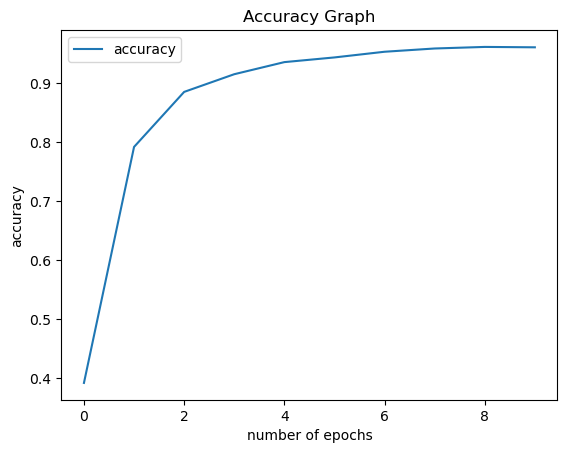

In [13]:
import matplotlib.pyplot as plt

plt.plot(cnn.history['accuracy'], label = 'accuracy')
plt.title('Accuracy Graph')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid
plt.show

In [18]:
test_labels = test_set.labels

In [19]:
prediction = classifier.predict(test_set)

709/709 [==============================] - 423s 597ms/step


In [20]:
import numpy as np
predict_labels = np.argmax(prediction, axis = -1) #taking the highest probablity, which is the resulting fruit class

In [21]:
# use a print array to plot the Confusion Matrix

from sklearn.metrics import confusion_matrix
np_set_printoptions(threshold = np.inf)

print('Confusion Matrix: \n', confusion_matrix(test_labels, predict_labels))

NameError: name 'np_set_printoptions' is not defined